# 8.1.2 KernelPCA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/jj25XR7nXEs?si=9IGMVytexUwUaHXC

El análisis de componentes principales realiza la extracción de las componentes ortogonales sucesivas de los datos mediante transformaciones lineales, con el fin de explicar la máxima cantidad de varianza. Sin embargo, este método no es exitoso cuando los datos contienen relaciones no lineales como se puede ver en el siguiente ejemplo.

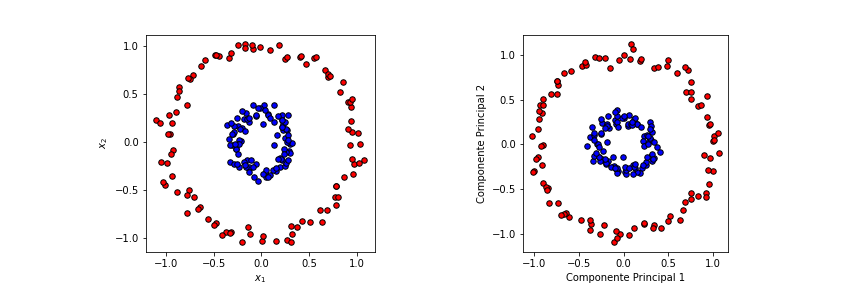

Como ya se explicó anteriormente, las transformaciones de kernel permiten aumentar la dimensionalidad de los datos, de tal forma que ciertos problemas complejos pueden hacerse lineales.

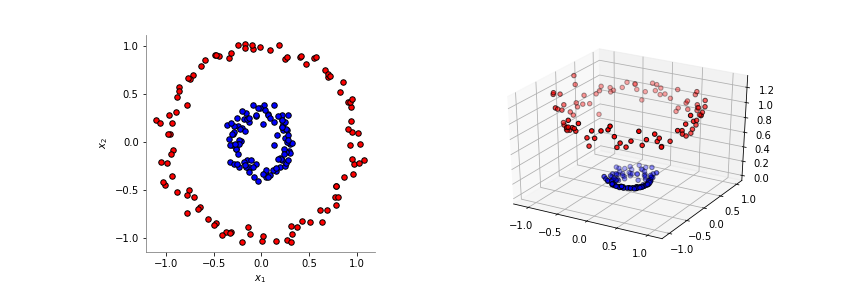

KernelPCA() es una extensión de la metodología de PCA que permite la reducción de dimensionalidad no lineal a través del uso de funciones kernel.

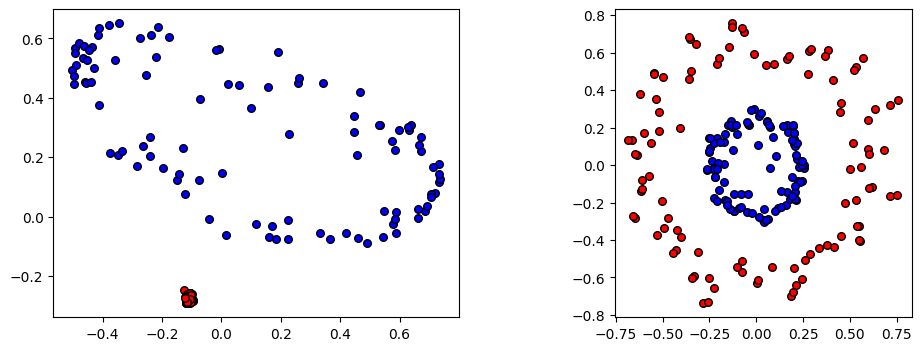

In [3]:
#
# Geenración del dataset
#
np.random.seed(0)
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05)


kernelPCA = KernelPCA(
    # --------------------------------------------------------------------------
    # Number of components. If None, all non-zero components are kept.
    n_components=None,
    # --------------------------------------------------------------------------
    # Kernel used for PCA.
    #   'linear', 'poly', 'rbf', 'sigmoid', 'cosine'
    kernel="rbf",
    # --------------------------------------------------------------------------
    # Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
    # kernels. If gamma is None, then it is set to 1/n_features.
    gamma=10,
    # --------------------------------------------------------------------------
    # Degree for poly kernels. Ignored by other kernels.
    degree=3,
    # --------------------------------------------------------------------------
    # Independent term in poly and sigmoid kernels.
    coef0=1,
    # --------------------------------------------------------------------------
    # Parameters (keyword arguments) and values for kernel passed as callable
    # object. Ignored by other kernels.
    kernel_params=None,
    # --------------------------------------------------------------------------
    # Hyperparameter of the ridge regression that learns the inverse transform
    # (when fit_inverse_transform=True).
    alpha=1.0,
    # --------------------------------------------------------------------------
    # Learn the inverse transform for non-precomputed kernels
    fit_inverse_transform=True,
)

X_kernelPCA = kernelPCA.fit_transform(X)
X_back = kernelPCA.inverse_transform(X_kernelPCA)

reds = y == 0
blues = y == 1

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1, aspect="equal")
plt.scatter(X_kernelPCA[reds, 0], X_kernelPCA[reds, 1], c="red", s=30, edgecolor="k")
plt.scatter(X_kernelPCA[blues, 0], X_kernelPCA[blues, 1], c="blue", s=30, edgecolor="k")

plt.subplot(1, 2, 2, aspect="equal")
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red", s=30, edgecolor="k")
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue", s=30, edgecolor="k")

plt.show()

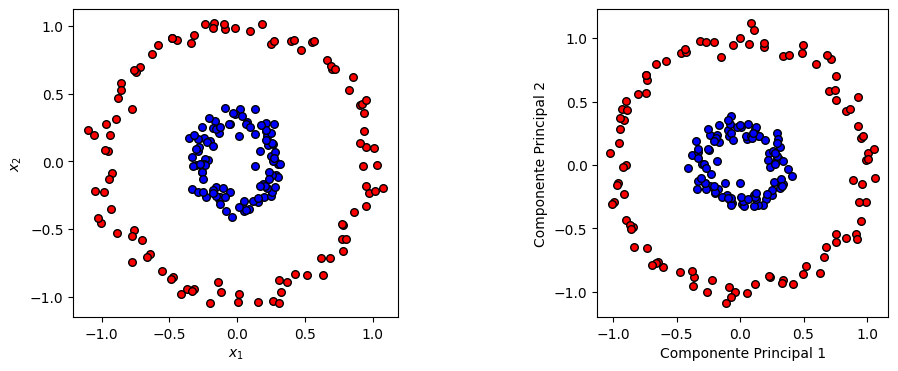

In [4]:
def fig1():
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.datasets import make_circles
    from sklearn.decomposition import PCA

    np.random.seed(0)

    X, y = make_circles(n_samples=200, factor=0.3, noise=0.05)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1, aspect="equal")

    reds = y == 0
    blues = y == 1

    plt.scatter(X[reds, 0], X[reds, 1], c="red", s=30, edgecolor="k")
    plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=30, edgecolor="k")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    #
    # Descomposición usando PCA
    #
    pca = PCA()
    X_pca = pca.fit_transform(X)

    plt.subplot(1, 2, 2, aspect="equal")
    plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=30, edgecolor="k")
    plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=30, edgecolor="k")

    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    # plt.savefig("images/circles_pca.png")
    # plt.close()


fig1()

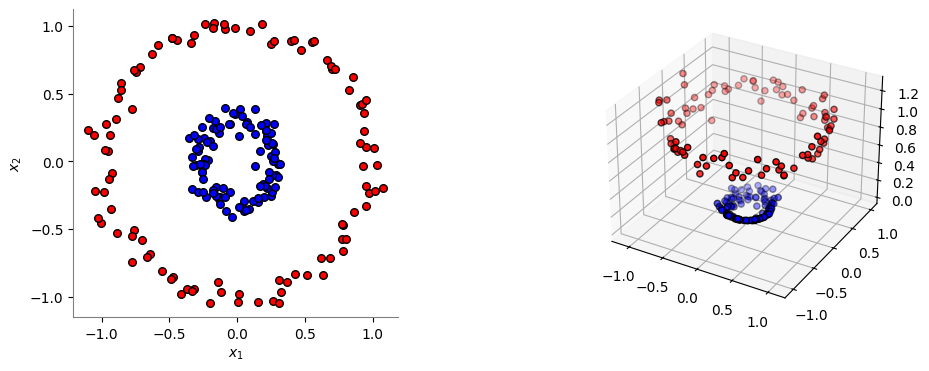

In [5]:
def fig2():
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.datasets import make_circles

    np.random.seed(0)

    X, y = make_circles(n_samples=200, factor=0.3, noise=0.05)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1, aspect="equal")

    reds = y == 0
    blues = y == 1

    plt.scatter(X[reds, 0], X[reds, 1], c="red", s=30, edgecolor="k")
    plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=30, edgecolor="k")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X_transf = np.c_[X, X[:, 0] ** 2 + X[:, 1] ** 2]

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(
        X_transf[reds, 0],
        X_transf[reds, 1],
        X_transf[reds, 2],
        marker="o",
        c="red",
        edgecolor="k",
    )
    ax.scatter(
        X_transf[blues, 0],
        X_transf[blues, 1],
        X_transf[blues, 2],
        marker="o",
        c="blue",
        edgecolor="k",
    )

    # plt.savefig("images/circles_kernel.png")
    # plt.close()


fig2()

In [6]:
print('ok_')

ok_
